## CS 2302 - Lab 6 - Graphs





## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive

Name:  Salvador Robles herrera

Student ID: 80683116

### Grading
As stated in the syllabus, your lab consists of two parts: the source code  and the report. This colab counts as your source code submission only. However, for your report submission, you  are more than welcome to extend your colab to include what is required for the report. Alternatively, you can use any other text editor to write your lab report (Google Docs, Word, etc.). I personally recommend to stick to Google Colab as you can write code to draw the required plots, which makes the whole process simpler. 

Each subsection in this colab is marked with point values, totaling 100 points.


## Problem 1 

### [30 points] Kruskal's Algorithm

Implement Kruskal's algorithm. Write your own implementation of the Graph and Disjoint Set Forest data structures.
 

In [22]:
# Your code goes here
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

#DISJOINT SET FOREST CLASS
class DisjointSetForest:
  def __init__(self, n):
    self.forest = [-1] * n

  def find(self, a):
    passed = set()
    return self.helper_find(a, passed)

  def helper_find(self, a, passed):
    if self.forest[a] < 0:
      return a
    if self.forest[a] in passed:
      print("There is a loop")
      return -1
    passed.add(self.forest[a])
    return self.helper_find(self.forest[a], passed)

  def union(self, a, b):
    if self.in_same_set(a,b):
      return
    ra = self.find(a)
    rb = self.find(b)

    if a == 1 and b == 4:
      print("ra ", ra)
      print("rb ", rb)
      print("self.forest[rb] ", self.forest[rb])

    self.forest[rb] = ra

  def in_same_set(self, a, b):
    if self.find(a) == self.find(b):
      return True
    return False

  def num_sets(self):
    num = 0
    for i in range(len(self.forest)):
      if self.forest[i] < 0:
        num += 1
    return num

  def is_equal(self, dsf):
    if len(self.forest) != len(dsf.forest):
      return False
    map = {}
    for i in range(len(self.forest)):
      if self.find(i) not in map:
        map[self.find(i)] = dsf.find(i)
      else:
        if self.find(i) != map[self.find]:
          return False
    return True

  def __str__(self):
    return str(self.forest)

#EDGE CLASS
class Edge:
  def __init__(self, source, dest, weight=1):
    self.source = source
    self.dest = dest
    self.weight = weight

  def __repr__(self):
    return f'{self.source}, {self.dest}, {self.weight}'

  def __gt__(self, other):
    if type (self) != type (other):
      return False
    return self.weight > other.weight

#GRAPH AL CLASS
class GraphAL:
  def __init__(self, vertices, weighted=False, directed=False):
    self.al = [[] for i in range(vertices)]
    self.weighted = weighted
    self.directed = directed
    self.representation = 'AL'

  def is_valid_vertex(self, u):
    return 0 <= u < len(self.al)

  def insert_vertex(self):
    self.al.append([])
    return len(self.al) - 1

  def insert_edge(self, source, dest, weight=1):
    self.al[source].append(Edge(source, dest, weight))
    if not self.directed:
      self.al[dest].append(Edge(dest, source, weight))
  
  def num_vertices(self):
    return len(self.al)

  def vertices_reachable_from(self, u):
    dests = []
    for edge in self.al[u]:
      dests.append(edge.dest) #Add only the destinations from u
    print("U: ", u, "Reachable: ", dests)
    return dests

  def display(self):
    print('[', end='')
    for i in range(len(self.al)):
      print('[', end='')
      for edge in self.al[i]:
        print('(' + str(edge.dest) + ',' + str(edge.weight) + ')', end='')
      print(']', end=' ')
    print(']')

  def draw(self):
    scale = 30
    fig, ax = plt.subplots()
    for i in range(len(self.al)):
      for edge in self.al[i]:
        d, w = edge.dest, edge.weight
        if self.directed or d > i:
          x = np.linspace(i * scale, d * scale)
          x0 = np.linspace(i * scale, d * scale, num=5)
          diff = np.abs(d - i)
          if diff == 1:
            y0 = [0, 0, 0, 0, 0]
          else:
            y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
          f = interp1d(x0, y0, kind='cubic')
          y = f(x)
          s = np.sign(i - d)
          ax.plot(x, s * y, linewidth=1, color='k')
          if self.directed:
            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
            yd = [y0[2] - 1, y0[2], y0[2] + 1]
            yd = [y * s for y in yd]
            ax.plot(xd, yd, linewidth=1, color='k')
          if self.weighted:
            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
            yd = [y0[2] - 1, y0[2], y0[2] + 1]
            yd = [y * s for y in yd]
            ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
      ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
      ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
              bbox=dict(facecolor='w', boxstyle="circle"))
    ax.axis('off')
    ax.set_aspect(1.0)
    plt.show()

#GRAPH AM CLASS
class GraphAM:
  def __init__(self, vertices, weighted=False, directed=False):
    self.am = []

    for i in range(vertices):  # Assumption / Design Decision: 0 represents non-existing edge
      self.am.append([0] * vertices)

    self.directed = directed
    self.weighted = weighted
    self.representation = 'AM'

  def is_valid_vertex(self, u):
    return 0 <= u < len(self.am)

  def insert_vertex(self):
    for lst in self.am:
      lst.append(0)

    new_row = [0] * (len(self.am) + 1)  # Assumption / Design Decision: 0 represents non-existing edge
    self.am.append(new_row)

    return len(self.am) - 1  # Return new vertex id

  def insert_edge(self, src, dest, weight=1):
    if not self.is_valid_vertex(src) or not self.is_valid_vertex(dest):
      return

    self.am[src][dest] = weight

    if not self.directed:
      self.am[dest][src] = weight

  def vertices_reachable_from(self, u):
    dests = []
    for i in range(len(self.am[u])):
      if self.am[u][i] != 0: #Add the columns of the row "u" that are not zero
        dests.append(i)
    print("U: ", u, "Reachable: ", dests)
    return dests

  def display(self):
    print('[', end='')
    for i in range(len(self.am)):
      print('[', end='')
      for j in range(len(self.am[i])):
        edge = self.am[i][j]
        if edge != 0:
          print('(' + str(j) + ',' + str(edge) + ')', end='')
      print(']', end=' ')
    print(']')

  def draw(self):
    scale = 30
    fig, ax = plt.subplots()
    for i in range(len(self.am)):
      for j in range(len(self.am[i])):
        edge = self.am[i][j]

        if edge != 0:
          d, w = j, edge
          if self.directed or d > i:
            x = np.linspace(i * scale, d * scale)
            x0 = np.linspace(i * scale, d * scale, num=5)
            diff = np.abs(d - i)
            if diff == 1:
              y0 = [0, 0, 0, 0, 0]
            else:
              y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
            f = interp1d(x0, y0, kind='cubic')
            y = f(x)
            s = np.sign(i - d)
            ax.plot(x, s * y, linewidth=1, color='k')
            if self.directed:
              xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
              yd = [y0[2] - 1, y0[2], y0[2] + 1]
              yd = [y * s for y in yd]
              ax.plot(xd, yd, linewidth=1, color='k')
            if self.weighted:
              xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
              yd = [y0[2] - 1, y0[2], y0[2] + 1]
              yd = [y * s for y in yd]
              ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
      ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
      ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
              bbox=dict(facecolor='w', boxstyle="circle"))
    ax.axis('off')
    ax.set_aspect(1.0)
    plt.show()

#GRAPH EL CLASS
class GraphEL:
  def __init__(self, vertices, weighted=False, directed=False):
    self.el = []
    self.vertices = vertices
    self.weighted = weighted
    self.directed = directed
    self.representation = 'EL'

  def is_valid_vertex(self, u):
    return 0 <= u < self.vertices

  def insert_edge(self, source, dest, weight=1):
    self.el.append([source, dest, weight])
  
  def num_vertices(self):
    s = set()
    for edge in self.el:
      s.add(edge[0]) #Add source
      s.add(edge[1]) #Add destination
    return len(s) 

  def vertices_reachable_from(self, u):
    dests = []
    for edge in self.el:
      if edge[0] == u: #If source is "u"
        dests.append(edge[1])
      elif edge[1] == u:
        dests.append(edge[0])
    print("U: ", u, "Reachable: ", dests)
    return dests


#ALGORITHM OF PROBLEM 1
def kruskalAlg(graph):
  sorted_edges = []

  for i in range(len(graph.al)):
    for edge in graph.al[i]:
      if edge.source > edge.dest:
        sorted_edges.append(edge)

  sorted_edges.sort(key = lambda x: x.weight)

  for edge in (sorted_edges):
    print(edge)

  min_spanning_tree = GraphAL(len(graph.al), weighted=True)
  dsf = DisjointSetForest(len(graph.al))

  for edge in sorted_edges:
    if dsf.find(edge.source) != dsf.find(edge.dest):
      min_spanning_tree.insert_edge(edge.source, edge.dest, edge.weight)
      dsf.union(edge.source, edge.dest)

  return min_spanning_tree #RETURN A GRAPH OF TYPE AL


Test your solution by calling it multiple times with different input values and comparing the output produced by your method to the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

FIRST GRAPH
[[(1,6)(2,4)] [(0,6)(2,20)(4,2)] [(0,4)(1,20)(3,5)] [(2,5)(4,50)(5,3)] [(3,50)(1,2)(5,70)] [(3,3)(4,70)] ]


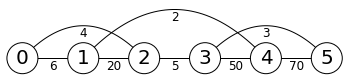

4, 1, 2
5, 3, 3
2, 0, 4
3, 2, 5
1, 0, 6
2, 1, 20
4, 3, 50
5, 4, 70


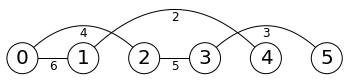

Expected: [[(2,4)(1,6)] [(4,2)(0,6)] [(0,4)(3,5)] [(5,3)(2,5)] [(1,2)] [(3,3)] ]
What I got: 
[[(2,4)(1,6)] [(4,2)(0,6)] [(0,4)(3,5)] [(5,3)(2,5)] [(1,2)] [(3,3)] ]


SECOND GRAPH
[[(1,1)] [(0,1)(2,2)(4,20)(3,20)(5,30)] [(1,2)(3,3)(5,70)(4,70)] [(2,3)(4,4)(5,30)(1,20)] [(3,4)(5,5)(1,20)(2,70)] [(4,5)(3,30)(2,70)(1,30)] ]


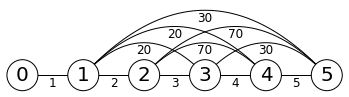

1, 0, 1
2, 1, 2
3, 2, 3
4, 3, 4
5, 4, 5
3, 1, 20
4, 1, 20
5, 3, 30
5, 1, 30
4, 2, 70
5, 2, 70


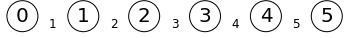

Expected: [[(1,1)] [(0,1)(2,2)] [(1,2)(3,3)] [(2,3)(4,4)] [(3,4)(5,5)] [(4,5)] ]
What I got: 
[[(1,1)] [(0,1)(2,2)] [(1,2)(3,3)] [(2,3)(4,4)] [(3,4)(5,5)] [(4,5)] ]


In [7]:
# Your test cases go here
print("FIRST GRAPH")
g = GraphAL(6, weighted=True)
g.insert_edge(0, 1,6)
g.insert_edge(0, 2,4)
g.insert_edge(1, 2,20)
g.insert_edge(2, 3,5)
g.insert_edge(3, 4,50)
g.insert_edge(4, 1,2)
g.insert_edge(3, 5,3)
g.insert_edge(4, 5,70)
g.display()
g.draw()

g1 = kruskalAlg(g)
g1.draw()
print("Expected: [[(2,4)(1,6)] [(4,2)(0,6)] [(0,4)(3,5)] [(5,3)(2,5)] [(1,2)] [(3,3)] ]")
print("What I got: ")
g1.display()

print()
print()

print("SECOND GRAPH")
g2 = GraphAL(6, weighted=True)
g2.insert_edge(0, 1,1)
g2.insert_edge(1, 2,2)
g2.insert_edge(2, 3,3)
g2.insert_edge(3, 4,4)
g2.insert_edge(4, 5,5)
g2.insert_edge(4, 1,20)
g2.insert_edge(3, 5,30)
g2.insert_edge(2, 5,70)
g2.insert_edge(3, 1,20)
g2.insert_edge(1, 5,30)
g2.insert_edge(2, 4,70)
g2.display()
g2.draw()

g3 = kruskalAlg(g2)
g3.draw()
print("Expected: [[(1,1)] [(0,1)(2,2)] [(1,2)(3,3)] [(2,3)(4,4)] [(3,4)(5,5)] [(4,5)] ]")
print("What I got: ")
g3.display()

## Problem 2 

### [70 points] Fox, Chicken, Sack of Grain

You have a fox, a chicken and a sack of grain. You must cross a river with only one of them at a time. If you leave the fox with the chicken he will eat it; if you leave the chicken with the grain he will eat it. How can you get all three across safely? In this problem, you are asked to implement a solution that uses a graph search algorithm.

Let’s represent the state of the world with four bits ⟨b0,b1,b2,b3⟩. Bit b0 represents the location of the fox, b1 represents the location of the chicken, b2 represents the location of the grain, and b3 represents your location. We will assume you are going from the left side to the right side of the river, thus for a particular bit bi, bi == 0 means the corresponding entity (fox, chicken, grain, or person) is on the left side of the river and bi == 1 means the entity is on the right side. We can represent states by nodes in a graph G = (V, E). Thus V = {⟨0,0,0,0⟩,⟨0,0,0,1⟩,...,⟨1,1,1,0⟩,⟨1,1,1,1⟩}, or you could use the decimal representations of the bit vector and thus V = {0, 1, ..., 14, 15}. Legal transitions between legal states will be represented by undirected edges in that graph. A transition is legal if the person moves from one side of the river to the other and is accompanied by zero or one other entities. A state is not legal if the fox can eat the chicken or the chicken can eat the grain, as explained above, otherwise it is legal. Thus (⟨0, 0, 0, 0⟩, ⟨0, 1, 0, 1⟩) ∈ E, corresponding to the person crossing the river with the chicken, while (⟨0, 0, 0, 0⟩, ⟨0, 0, 1, 1⟩)  is not in E, since ⟨0, 0, 1, 1⟩ is not a legal state (the fox eats the chicken).

We can now find the solution to the problem by finding a path going from state ⟨0, 0, 0, 0⟩ to state ⟨1, 1, 1, 1⟩ in the graph. Your task is to implement six different solutions to the problem the three graph representations (adjacency list, adjacency matrix and edge list) and two search algorithms (breadth-first search and depth-first search).


In [23]:
# Your code goes here

#PROBLEM WITH GRAPH AL REPRESENTATION
def fox_chicken_grain_AL():
  valids = [] #Valid positions
  edges = [] #Edges in the graph
  g = GraphAL(16)
  
  for i in range(16):
    #print(i, ": ", get_fox(i), get_chicken(i), get_grain(i), get_person(i))
    if validPosition(i):
      valids.append(i)

  print("Valids ", valids)
  
  for i in range(len(valids)-1):
    j = i
    while j < (len(valids)):
      print("Valids ", valids[i] , valids[j])
      if validTransition(valids[i], valids[j]):
        print("Transition ", valids[i] , valids[j])
        g.insert_edge(valids[i], valids[j])
        edges.append(Edge(valids[i],valids[j]))
      j += 1

  print("Edges: ", edges)
  return g

#PROBLEM WITH GRAPH AM REPRESENTATION
def fox_chicken_grain_AM():
  valids = [] #Valid positions
  edges = [] #Edges in the graph
  g = GraphAM(16)
  
  for i in range(16):
    #print(i, ": ", get_fox(i), get_chicken(i), get_grain(i), get_person(i))
    if validPosition(i):
      valids.append(i)

  print("Valids ", valids)
  
  for i in range(len(valids)-1):
    j = i
    while j < (len(valids)):
      print("Valids ", valids[i] , valids[j])
      if validTransition(valids[i], valids[j]):
        print("Transition ", valids[i] , valids[j])
        g.insert_edge(valids[i], valids[j])
        edges.append(Edge(valids[i],valids[j]))
      j += 1

  print("Edges: ", edges)
  return g


#PROBLEM WITH GRAPH EL REPRESENTATION
def fox_chicken_grain_EL():
  valids = [] #Valid positions
  edges = [] #Edges in the graph
  g = GraphEL(16)
  
  for i in range(16):
    #print(i, ": ", get_fox(i), get_chicken(i), get_grain(i), get_person(i))
    if validPosition(i):
      valids.append(i)

  print("Valids ", valids)
  
  for i in range(len(valids)-1):
    j = i
    while j < (len(valids)):
      print("Valids ", valids[i] , valids[j])
      if validTransition(valids[i], valids[j]):
        print("Transition ", valids[i] , valids[j])
        g.insert_edge(valids[i], valids[j])
        edges.append(Edge(valids[i],valids[j]))
      j += 1

  print("Edges: ", edges)
  return g

#TO CHECK VALID NODES
def validPosition(n):
  if (get_fox(n) == get_chicken(n)) and (get_person(n) != get_fox(n)):
    return False
  if (get_grain(n) == get_chicken(n)) and (get_person(n) != get_grain(n)):
    return False
  return True

#TO CHECK VALID EDGES
def validTransition(i,j):
  if i == j:
    return False
  if get_person(i) == get_person(j):
    return False
  person_in_one = False
  if get_person(i):
    person_in_one = True

  one_to_zero = 0 #Changes from position one to position zero
  zero_to_one = 0 #Changes from position zero to position one

  if get_fox(i) and (not get_fox(j)):
    one_to_zero += 1
  if get_chicken(i) and (not get_chicken(j)):
    one_to_zero += 1
  if get_grain(i) and (not get_grain(j)):
    one_to_zero += 1

  if (not get_fox(i)) and get_fox(j):
    zero_to_one += 1
  if (not get_chicken(i)) and get_chicken(j):
    zero_to_one += 1
  if (not get_grain(i)) and get_grain(j):
    zero_to_one += 1

  if person_in_one: #Depending on the person position
    if zero_to_one > 0:
      return False
    if one_to_zero > 1:
      return False
    return True
  else:
    if one_to_zero > 0:
      return False
    if zero_to_one > 1:
      return False
    return True
  
def get_bit(n, pos):
  return n & (1<<pos)!=0

def get_fox(n):
  return get_bit(n,0)

def get_chicken(n):
  return get_bit(n,1)

def get_grain(n):
  return get_bit(n,2)

def get_person(n):
  return get_bit(n,3)

#BFS and DFS for graph AL representation
def b_f_s_AL(graph, start):
  visited_order = []
  visited = [False] * len(graph.al)
  path = [-1] * len(graph.al)

  queue = []
  queue.append(start)
  visited[start] = True
  visited_order.append(start)

  while len(queue) > 0:
    u = queue.pop(0)
    for adj_vertex in graph.vertices_reachable_from(u):
      if not visited[adj_vertex]:
        visited[adj_vertex] = True
        visited_order.append(adj_vertex)
        path[adj_vertex] = u
        queue.append(adj_vertex)

  return visited_order

def d_f_s_AL(graph, start):
  visited_order = []
  visited = [False] * len(graph.al)
  path = [-1] * len(graph.al) 

  stack = [start]
  while len(stack) > 0:
    u = stack.pop()

    if not visited[u]:
      visited[u] = True
      visited_order.append(u)

      for adj_vertex in graph.vertices_reachable_from(u):
        if not visited[adj_vertex]:
          path[adj_vertex] = u
          stack.append(adj_vertex)
  return visited_order

#BFS and DFS for graph AM representation
def b_f_s_AM(graph, start):
  visited_order = []
  visited = [False] * len(graph.am)
  path = [-1] * len(graph.am)

  queue = []
  queue.append(start)
  visited[start] = True
  visited_order.append(start)

  while len(queue) > 0:
    u = queue.pop(0)
    for adj_vertex in graph.vertices_reachable_from(u):
      if not visited[adj_vertex]:
        visited[adj_vertex] = True
        visited_order.append(adj_vertex)
        path[adj_vertex] = u
        queue.append(adj_vertex)

  return visited_order

def d_f_s_AM(graph, start):
  visited_order = []
  visited = [False] * len(graph.am)
  path = [-1] * len(graph.am) 

  stack = [start]
  while len(stack) > 0:
    u = stack.pop()

    if not visited[u]:
      visited[u] = True
      visited_order.append(u)

      for adj_vertex in graph.vertices_reachable_from(u):
        if not visited[adj_vertex]:
          path[adj_vertex] = u
          stack.append(adj_vertex)
  return visited_order  
    

#BFS and DFS for graph EL representation
def b_f_s_EL(graph, start):
  visited_order = []
  visited = [False] * graph.vertices
  path = [-1] * graph.vertices

  queue = []
  queue.append(start)
  visited[start] = True
  visited_order.append(start)

  while len(queue) > 0:
    u = queue.pop(0)
    for adj_vertex in graph.vertices_reachable_from(u):
      if not visited[adj_vertex]:
        visited[adj_vertex] = True
        visited_order.append(adj_vertex)
        path[adj_vertex] = u
        queue.append(adj_vertex)

  return visited_order

def d_f_s_EL(graph, start):
  visited_order = []
  visited = [False] * graph.vertices
  path = [-1] * graph.vertices

  stack = [start]
  while len(stack) > 0:
    u = stack.pop()

    if not visited[u]:
      visited[u] = True
      visited_order.append(u)

      for adj_vertex in graph.vertices_reachable_from(u):
        if not visited[adj_vertex]:
          path[adj_vertex] = u
          stack.append(adj_vertex)
  return visited_order  

Test your solutions by calling them multiple times with different input values and comparing the output produced by your methods to the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

Expected BFS:  [0, 1, 2, 4, 5, 10, 11, 13, 14, 15]
Expected DFS:  [0, 10, 2, 14, 4, 13, 5, 15, 1, 11]
ADJACENCY LIST
Valids  [0, 1, 2, 4, 5, 10, 11, 13, 14, 15]
Valids  0 0
Valids  0 1
Valids  0 2
Valids  0 4
Valids  0 5
Valids  0 10
Transition  0 10
Valids  0 11
Valids  0 13
Valids  0 14
Valids  0 15
Valids  1 1
Valids  1 2
Valids  1 4
Valids  1 5
Valids  1 10
Valids  1 11
Transition  1 11
Valids  1 13
Transition  1 13
Valids  1 14
Valids  1 15
Valids  2 2
Valids  2 4
Valids  2 5
Valids  2 10
Transition  2 10
Valids  2 11
Transition  2 11
Valids  2 13
Valids  2 14
Transition  2 14
Valids  2 15
Valids  4 4
Valids  4 5
Valids  4 10
Valids  4 11
Valids  4 13
Transition  4 13
Valids  4 14
Transition  4 14
Valids  4 15
Valids  5 5
Valids  5 10
Valids  5 11
Valids  5 13
Transition  5 13
Valids  5 14
Valids  5 15
Transition  5 15
Valids  10 10
Valids  10 11
Valids  10 13
Valids  10 14
Valids  10 15
Valids  11 11
Valids  11 13
Valids  11 14
Valids  11 15
Valids  13 13
Valids  13 14
Valids  13

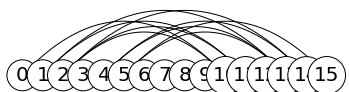

U:  0 Reachable:  [10]
U:  10 Reachable:  [0, 2]
U:  2 Reachable:  [10, 11, 14]
U:  11 Reachable:  [1, 2]
U:  14 Reachable:  [2, 4]
U:  1 Reachable:  [11, 13]
U:  4 Reachable:  [13, 14]
U:  13 Reachable:  [1, 4, 5]
U:  5 Reachable:  [13, 15]
U:  15 Reachable:  [5]
Visited order BFS:  [0, 10, 2, 11, 14, 1, 4, 13, 5, 15]
U:  0 Reachable:  [10]
U:  10 Reachable:  [0, 2]
U:  2 Reachable:  [10, 11, 14]
U:  14 Reachable:  [2, 4]
U:  4 Reachable:  [13, 14]
U:  13 Reachable:  [1, 4, 5]
U:  5 Reachable:  [13, 15]
U:  15 Reachable:  [5]
U:  1 Reachable:  [11, 13]
U:  11 Reachable:  [1, 2]
Visited order DFS:  [0, 10, 2, 14, 4, 13, 5, 15, 1, 11]


ADJACENCY MATRIX
Valids  [0, 1, 2, 4, 5, 10, 11, 13, 14, 15]
Valids  0 0
Valids  0 1
Valids  0 2
Valids  0 4
Valids  0 5
Valids  0 10
Transition  0 10
Valids  0 11
Valids  0 13
Valids  0 14
Valids  0 15
Valids  1 1
Valids  1 2
Valids  1 4
Valids  1 5
Valids  1 10
Valids  1 11
Transition  1 11
Valids  1 13
Transition  1 13
Valids  1 14
Valids  1 15
Valids

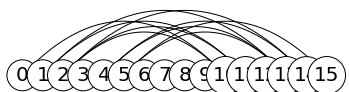

U:  0 Reachable:  [10]
U:  10 Reachable:  [0, 2]
U:  2 Reachable:  [10, 11, 14]
U:  11 Reachable:  [1, 2]
U:  14 Reachable:  [2, 4]
U:  1 Reachable:  [11, 13]
U:  4 Reachable:  [13, 14]
U:  13 Reachable:  [1, 4, 5]
U:  5 Reachable:  [13, 15]
U:  15 Reachable:  [5]
Visited order3:  [0, 10, 2, 11, 14, 1, 4, 13, 5, 15]
U:  0 Reachable:  [10]
U:  10 Reachable:  [0, 2]
U:  2 Reachable:  [10, 11, 14]
U:  14 Reachable:  [2, 4]
U:  4 Reachable:  [13, 14]
U:  13 Reachable:  [1, 4, 5]
U:  5 Reachable:  [13, 15]
U:  15 Reachable:  [5]
U:  1 Reachable:  [11, 13]
U:  11 Reachable:  [1, 2]
Visited order4:  [0, 10, 2, 14, 4, 13, 5, 15, 1, 11]


EDGE LIST
Valids  [0, 1, 2, 4, 5, 10, 11, 13, 14, 15]
Valids  0 0
Valids  0 1
Valids  0 2
Valids  0 4
Valids  0 5
Valids  0 10
Transition  0 10
Valids  0 11
Valids  0 13
Valids  0 14
Valids  0 15
Valids  1 1
Valids  1 2
Valids  1 4
Valids  1 5
Valids  1 10
Valids  1 11
Transition  1 11
Valids  1 13
Transition  1 13
Valids  1 14
Valids  1 15
Valids  2 2
Valids 

In [25]:
# Your test cases go here
print("Expected BFS: ", [0, 1, 2, 4, 5, 10, 11, 13, 14, 15])
print("Expected DFS: ", [0, 10, 2, 14, 4, 13, 5, 15, 1, 11])
print("ADJACENCY LIST")
graphFCG1 = fox_chicken_grain_AL()
graphFCG1.display()
graphFCG1.draw()
visited_order1 = b_f_s_AL(graphFCG1, 0)
print("Visited order BFS: ", visited_order1)
visited_order2 = d_f_s_AL(graphFCG1, 0)
print("Visited order DFS: ", visited_order2)

print()
print()
print("ADJACENCY MATRIX")
graphFCG2 = fox_chicken_grain_AM()
graphFCG2.display()
graphFCG2.draw()
visited_order3 = b_f_s_AM(graphFCG2, 0)
print("Visited order3: ", visited_order3)
visited_order4 = d_f_s_AM(graphFCG2, 0)
print("Visited order4: ", visited_order4)

print()
print()
print("EDGE LIST")
graphFCG3 = fox_chicken_grain_EL()
print("EDGES OF GRAPHHHH")
print(graphFCG3.el)
visited_order5 = b_f_s_EL(graphFCG3, 0)
print("Visited order5: ", visited_order5)
visited_order6 = d_f_s_EL(graphFCG3, 0)
print("Visited order6: ", visited_order6)

## How to Submit This Lab

1. File > Download .ipynb
2. Go to Blackboard, find the lab submission page, and upload the .ipynb file you just downloaded.

## Grading Rubric

|     Criteria    	|     Proficient    	|     Satisfactory    	|     Unsatisfactory    	|
|-	|-	|-	|-	|
|     Correctness    	|     The code compiles, runs, and solves the problem.                	|     The code compiles, runs, but does not solve the problem (partial implementation).    	|     The code does not compile/run, or little progress was made.          	|
|     Space and Time </br> complexities    	|     Appropriate for the problem.    	|     Can be greatly improved.    	|     Space and time complexity not analyzed     	|
|     Problem Decomposition    	|     Operations are broken down into loosely coupled, highly cohesive   methods    	|     Operations are broken down into methods, but they are not loosely   coupled/highly cohesive    	|     Most of the logic is inside a couple of big methods          	|
|     Style    	|     Variables and methods have meaningful/appropriate names     	|     Only a subset of the variables and methods have   meaningful/appropriate names     	|     Few or none of the variables and methods have meaningful/appropriate   names     	|
|     Robustness    	|     Program handles erroneous or unexpected input gracefully    	|     Program handles some erroneous or unexpected input gracefully    	|     Program does not handle erroneous or unexpected input gracefully    	|
|     Documentation    	|     Non-obvious code segments are well documented    	|     Some non-obvious code segments are documented    	|     Few or none non-obvious segments are documented    	|
|     Report     	|     Covers all required material in a concise and clear way with proper   grammar and spelling.    	|     Covers a subset of the required material in a concise and clear way   with proper grammar and spelling.    	|     Does not cover enough material and/or the material is not presented   in a concise and clear way with proper grammar and spelling.    	|